<a href="https://colab.research.google.com/github/SudarshanIngole/Machine-Learning-Projects/blob/main/PRCP_FIFA_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

This is the FIFA20 Dataset.
It has a huge records.
Let's analyse the data.

---



Exploratory Data Analysis

---



In [17]:
data = pd.read_csv('/content/players_20.csv')


**We are checking the top 5 records of dataset**

In [18]:
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


Bottom 5 records of dataset

In [5]:
data.tail()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
12640,220498,https://sofifa.com/player/220498/davide-mazzoc...,D. Mazzocco,Davide Mazzocco,23,1995-10-06,186,75,Italy,Pordenone,...,60+2,61+2,61+2,61+2,60+2,59+2,59+2,59+2,59+2,59+2
12641,220579,https://sofifa.com/player/220579/younes-kaabou...,Y. Kaabouni,Younès Kaabouni,24,1995-05-23,179,66,France,FC Sochaux-Montbéliard,...,55+2,54+2,54+2,54+2,55+2,54+2,51+2,51+2,51+2,54+2
12642,220654,https://sofifa.com/player/220654/james-horsfie...,J. Horsfield,James Horsfield,23,1995-09-21,180,74,England,Scunthorpe United,...,62+2,62+2,62+2,62+2,62+2,61+2,60+2,60+2,60+2,61+2
12643,221165,https://sofifa.com/player/221165/carlos-calder...,Calderón,Carlos Calderón López,24,1995-04-14,182,70,Spain,CD Lugo,...,47+2,43+2,43+2,43+2,47+2,44+2,36+2,36+2,36+2,44+2
12644,221961,https://sofifa.com/player/221961/amaury-torral...,A. Torralvo,Amaury Torralvo Polo,25,1994-01-12,170,65,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,12645.000000,12645.000000,12645.000000,12645.000000,12644.000000,12644.000000,1.264400e+04,12644.000000,12644.000000,12644.000000,...,12644.000000,12644.000000,12644.000000,12644.000000,12644.000000,12644.000000,12644.000000,12644.000000,12644.000000,12644.000000
mean,213070.025860,26.497193,181.486675,75.869988,69.745650,73.368238,3.480735e+06,12939.734261,1.149083,3.022303,...,51.164742,62.923758,50.152721,50.515027,48.107877,16.235527,16.039703,15.880655,16.113967,16.403986
std,27843.700138,4.304280,6.773888,7.044601,4.914551,5.550338,6.470536e+06,24882.710035,0.447866,0.672137,...,15.575642,10.106099,20.228952,21.927126,21.756261,17.887581,17.062809,16.607712,17.423091,18.239238
min,768.000000,16.000000,156.000000,52.000000,63.000000,64.000000,0.000000e+00,0.000000,1.000000,1.000000,...,9.000000,12.000000,1.000000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,199142.000000,23.000000,177.000000,71.000000,66.000000,69.000000,6.750000e+05,2000.000000,1.000000,3.000000,...,41.000000,57.000000,32.000000,30.000000,26.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,216271.000000,26.000000,182.000000,76.000000,69.000000,73.000000,1.100000e+06,5000.000000,1.000000,3.000000,...,53.000000,64.000000,58.000000,61.000000,57.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,233309.000000,30.000000,186.000000,80.000000,73.000000,77.000000,3.600000e+06,14000.000000,1.000000,3.000000,...,63.000000,69.000000,66.000000,68.000000,66.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252877.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


* Describe function shows the numerical columns/features information like mean of the column, maximum value minimum value etc.
* Height  == max. height = 205 cm, minimum height = 181.4 cm
* Weight == max weight = 110 kg, minimum weight = 75 kg
* Average Age 26 years


In [7]:
data.describe(include='O')

,player_url,short_name,long_name,dob,nationality,club,player_positions,preferred_foot,work_rate,body_type,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
count,12645,12645,12645,12645,12644,12644,12644,12644,12644,12644,...,11435,11435,11435,11435,11435,11435,11435,11435,11435,11435
unique,12645,12118,12619,5275,154,689,577,2,9,10,...,92,92,92,92,92,91,108,108,108,91
top,https://sofifa.com/player/158023/lionel-messi/...,J. Rodríguez,Liam Kelly,1992-02-29,Spain,FC Barcelona,CB,Right,Medium/Medium,Normal,...,63+2,63+2,63+2,63+2,63+2,63+2,63+2,63+2,63+2,63+2
freq,1,9,3,108,915,33,1699,9525,6010,7700,...,606,591,591,591,606,649,593,593,593,649


In [8]:
len(data.columns)
len(data)

print(("Total Number of columns"),len(data.columns))
print(('Total Number of Rows'),len(data))

Total Number of columns 104
Total Number of Rows 12645


In [9]:
column_names = list(data.columns[0:29])
print(column_names, end = ' ')


['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until'] 

* Analysing the Column one by one
* First we are going to analyse the column "Age"

In [10]:
data["age"]

0        32
1        34
2        27
3        26
4        28
         ..
12640    23
12641    24
12642    23
12643    24
12644    25
Name: age, Length: 12645, dtype: int64

In [11]:
print(data['age'].max())
print(data['age'].min())

42
16


* The maximum age of a player is 42
* The minimum age of a player is 16

In [19]:
data.loc[data['age']==data['age'].max(), data.columns[:15]]

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions
11832,142998,https://sofifa.com/player/142998/cristian-muno...,C. Muñoz,Cristian Fernando Muñoz Hoffman,42,1977-07-01,177,73,Argentina,CD Universidad de Concepción,64,64,50000,1000,GK
13003,208927,https://sofifa.com/player/208927/hussain-omar-...,H. Sulaimani,Hussein Omar Abdul Ghani Sulaimani,42,1977-01-21,173,70,Saudi Arabia,Al Ahli,63,63,0,5000,LB


In [20]:
data.loc[data['age']==data['age'].min(), data.columns[:30]]

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position
4764,246618,https://sofifa.com/player/246618/adam-hlozek/2...,A. Hložek,Adam Hložek,16,2002-07-25,185,80,Czech Republic,Sparta Praha,...,Normal,No,9900000.0,NaN,RM,20.0,NaN,2018-01-01,2022.0,NaN
6630,252037,https://sofifa.com/player/252037/fabio-daniel-...,Fábio Silva,Fábio Daniel Soares Silva,16,2002-07-19,185,75,Portugal,FC Porto,...,Normal,No,4700000.0,NaN,SUB,49.0,NaN,2019-07-01,2022.0,NaN
12158,252259,https://sofifa.com/player/252259/enzo-millot/2...,E. Millot,Enzo Millot,16,2002-07-17,175,65,France,AS Monaco,...,Lean,No,2300000.0,NaN,RES,49.0,NaN,2019-07-30,2022.0,NaN
12160,247888,https://sofifa.com/player/247888/sebastiano-es...,S. Esposito,Sebastiano Esposito,16,2002-07-02,186,75,Italy,Inter,...,Lean,No,2200000.0,NaN,SUB,70.0,NaN,2019-01-23,2022.0,NaN
14626,252238,https://sofifa.com/player/252238/alan-velasco/...,A. Velasco,Alan Velasco,16,2002-07-27,167,63,Argentina,Independiente,...,Lean,No,1100000.0,NaN,SUB,9.0,NaN,2018-07-01,2022.0,NaN
17614,248187,https://sofifa.com/player/248187/daniel-obbekj...,D. Obbekjær,Daniel Obbekjær,16,2002-07-16,193,86,Denmark,Odense Boldklub,...,Lean,No,206000.0,NaN,SUB,22.0,NaN,2019-04-01,2021.0,NaN
17782,248567,https://sofifa.com/player/248567/sebastian-and...,S. Anderson,Sebastian Anderson,16,2002-08-08,175,64,United States,Colorado Rapids,...,Lean,No,245000.0,NaN,SUB,22.0,NaN,2019-04-03,2023.0,NaN
17827,251219,https://sofifa.com/player/251219/darragh-burns...,D. Burns,Darragh Burns,16,2002-08-06,176,62,Northern Ireland,St. Patrick's Athletic,...,Lean,No,218000.0,NaN,SUB,35.0,NaN,2019-06-08,2020.0,NaN
18031,246815,https://sofifa.com/player/246815/oliver-stefan...,O. Stefánsson,Oliver Stefánsson,16,2002-08-03,190,75,Iceland,IFK Norrköping,...,Lean,No,113000.0,NaN,RES,26.0,NaN,2019-01-01,2022.0,NaN
18171,252892,https://sofifa.com/player/252892/joseph-starbu...,J. Starbuck,Joseph Starbuck,16,2002-08-03,174,69,England,Grimsby Town,...,Normal,No,165000.0,NaN,RES,29.0,NaN,2019-07-01,2023.0,NaN


In [21]:
data.isnull().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64

In [22]:


import pandas as pd

# Assuming 'df' is your DataFrame
#pd.set_option('display.max_rows', None)  # Show all rows
#pd.set_option('display.max_columns', None)  # Show all columns

print(data.isnull().sum())


sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64


In [16]:
data

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12640,220498,https://sofifa.com/player/220498/davide-mazzoc...,D. Mazzocco,Davide Mazzocco,23,1995-10-06,186,75,Italy,Pordenone,...,60+2,61+2,61+2,61+2,60+2,59+2,59+2,59+2,59+2,59+2
12641,220579,https://sofifa.com/player/220579/younes-kaabou...,Y. Kaabouni,Younès Kaabouni,24,1995-05-23,179,66,France,FC Sochaux-Montbéliard,...,55+2,54+2,54+2,54+2,55+2,54+2,51+2,51+2,51+2,54+2
12642,220654,https://sofifa.com/player/220654/james-horsfie...,J. Horsfield,James Horsfield,23,1995-09-21,180,74,England,Scunthorpe United,...,62+2,62+2,62+2,62+2,62+2,61+2,60+2,60+2,60+2,61+2
12643,221165,https://sofifa.com/player/221165/carlos-calder...,Calderón,Carlos Calderón López,24,1995-04-14,182,70,Spain,CD Lugo,...,47+2,43+2,43+2,43+2,47+2,44+2,36+2,36+2,36+2,44+2


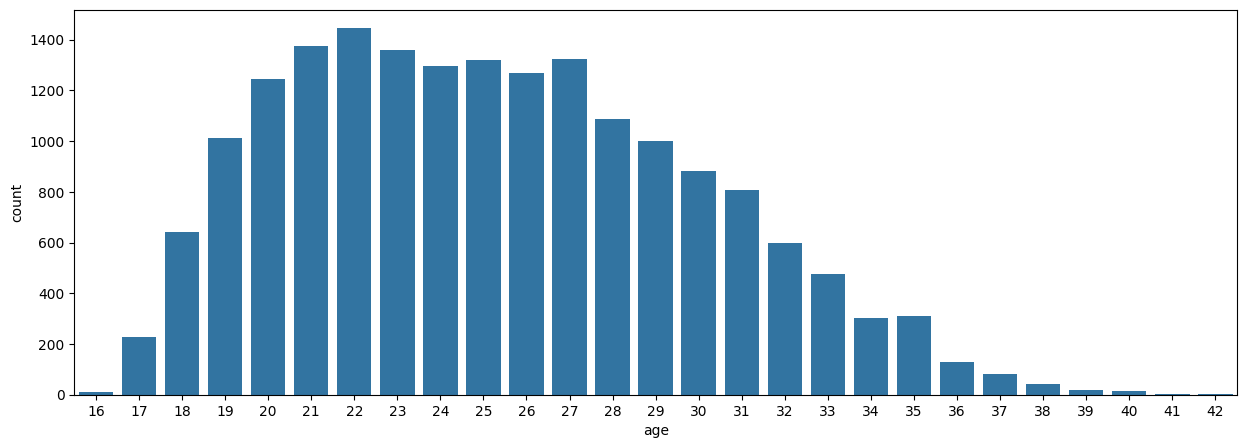

In [42]:
plt.figure(figsize=(15,5))
sns.countplot(x='age', data=data)
plt.show()

* ## From the above graph we can see that most of the players are in between 20  to 30 years of Age.

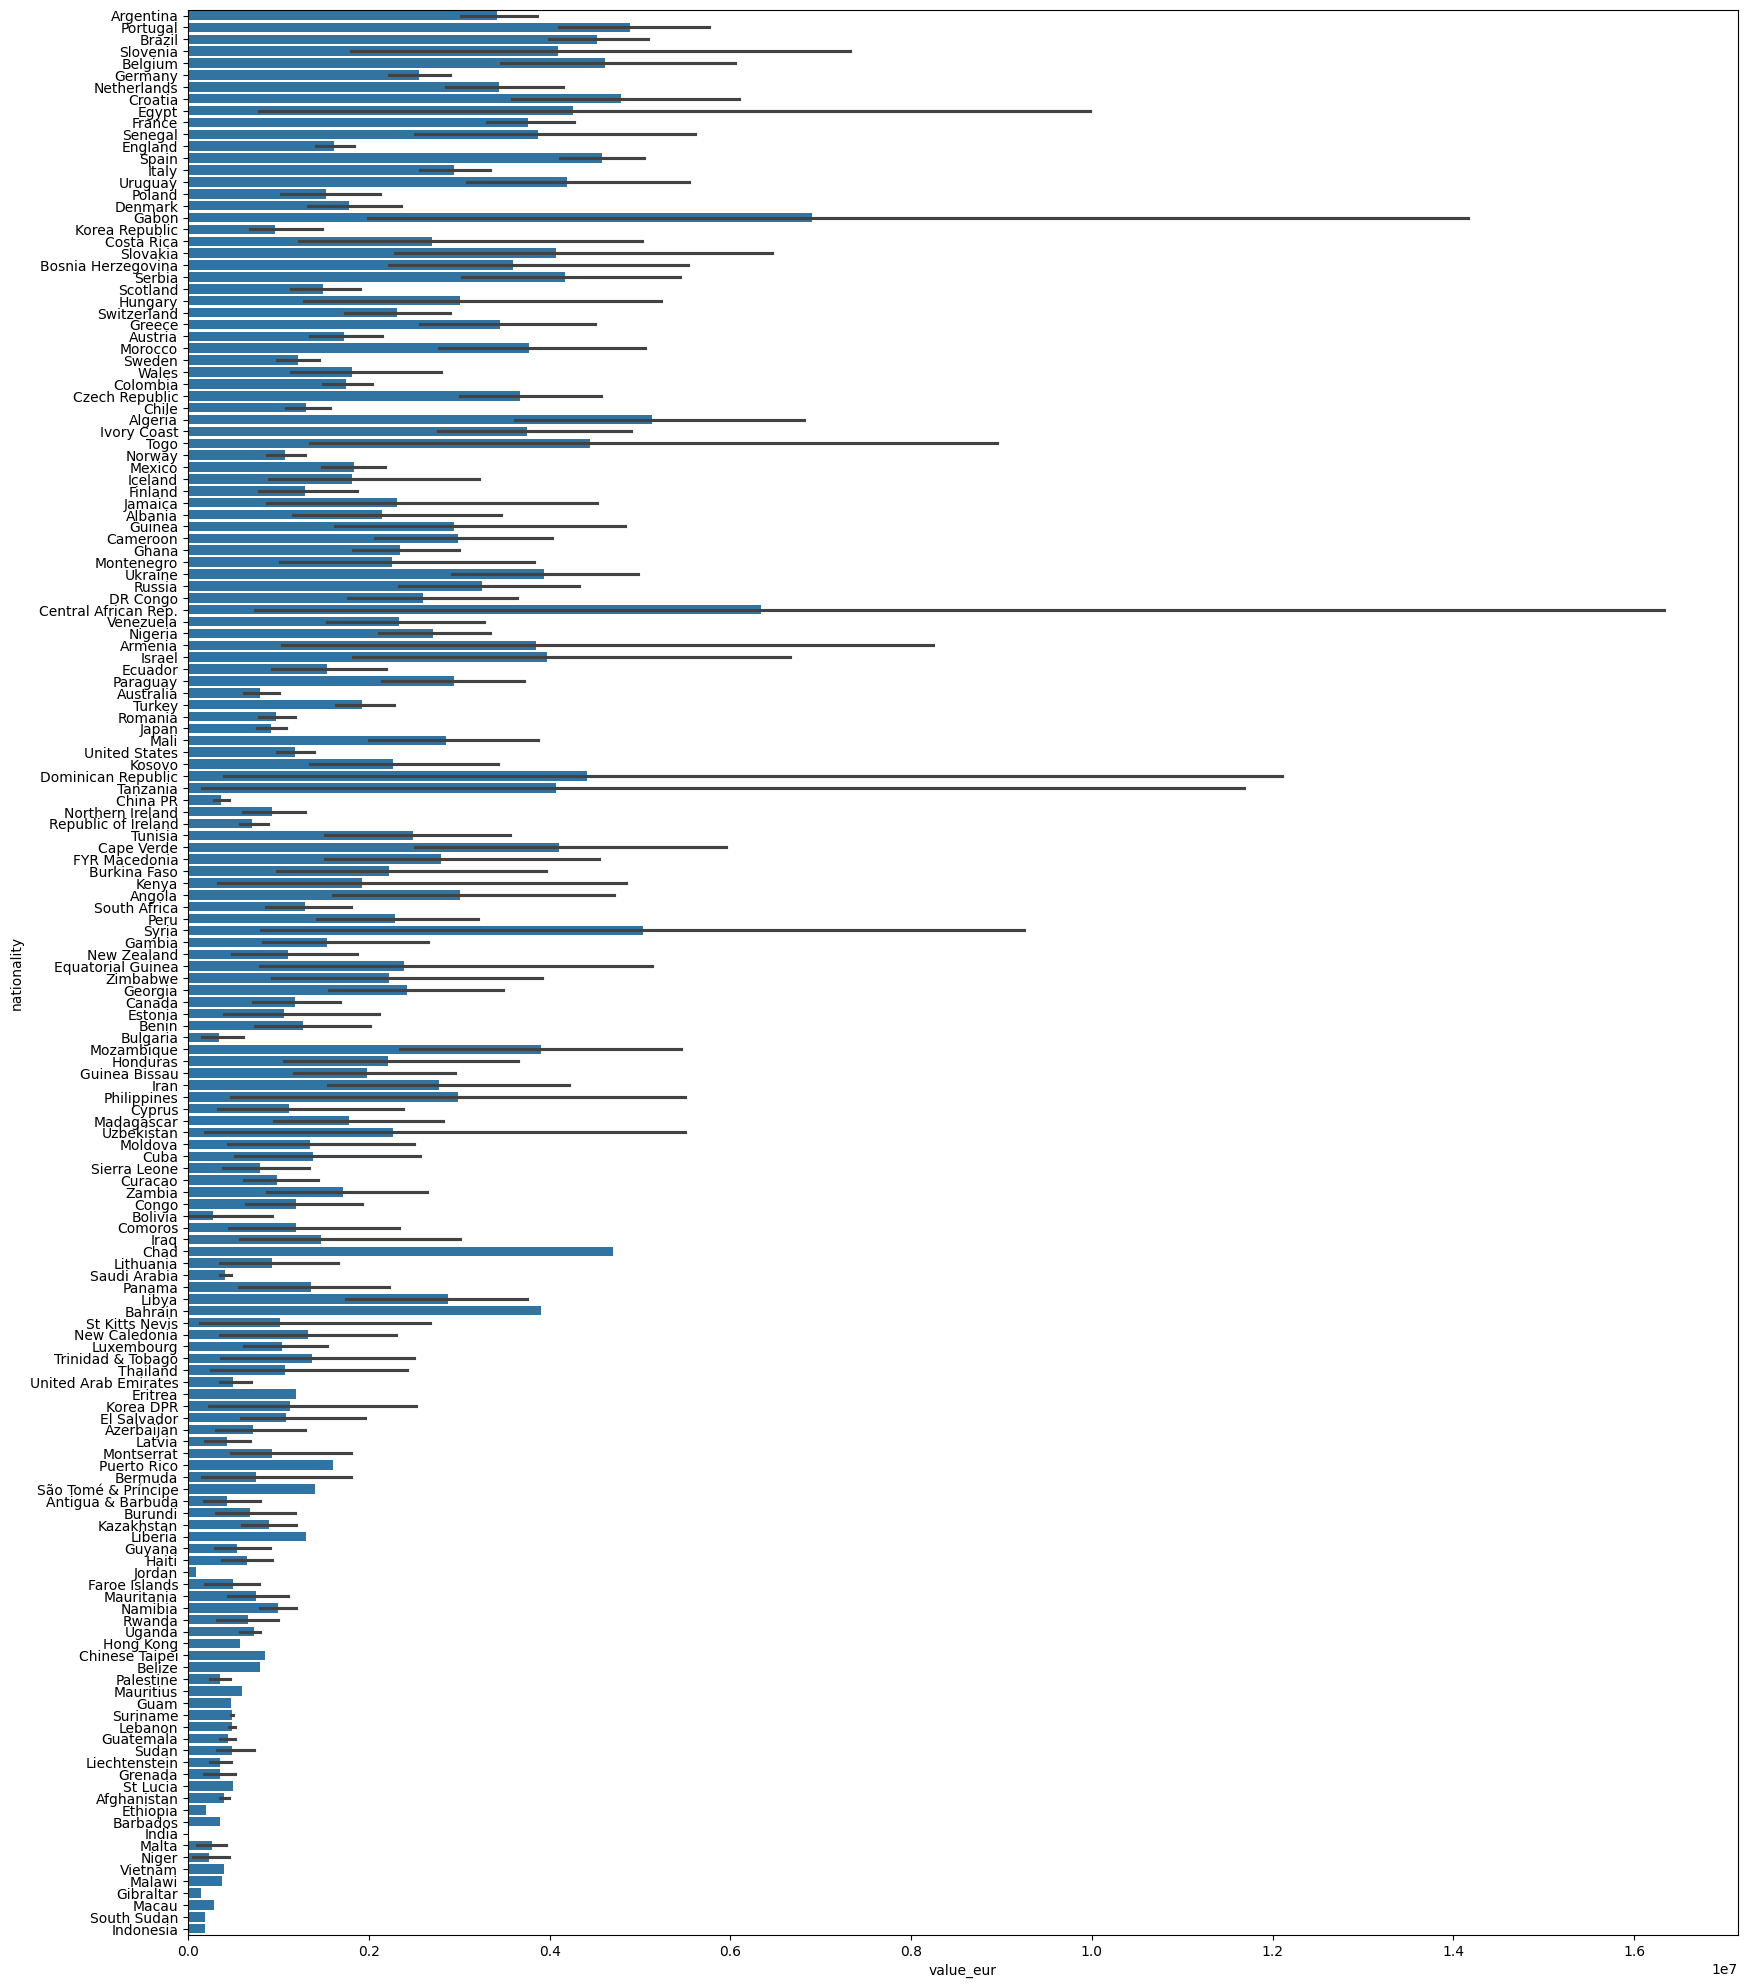

In [43]:
plt.figure(figsize=(20,25))
sns.barplot(x='value_eur',y='nationality', data=data)
plt.show()

* Central African Republic country has maximun value in euro.


In [30]:
data.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

In [44]:
data.value_eur.max()

105500000

In [49]:
min_value_country = data[data['value_eur'] == data['value_eur'].min()]['nationality'].values[0]
print(f"Country with minimum 'value_eur' price: {min_value_country}")


Country with minimum 'value_eur' price: Uruguay


In [48]:
data['nationality']==

0        Argentina
1         Portugal
2           Brazil
3         Slovenia
4          Belgium
           ...    
18273     China PR
18274     China PR
18275     China PR
18276     China PR
18277     China PR
Name: nationality, Length: 18278, dtype: object

In [56]:
data.loc[data['nationality'] == 'Uruguay']


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
19,176580,https://sofifa.com/player/176580/luis-suarez/2...,L. Suárez,Luis Alberto Suárez Díaz,32,1987-01-24,182,86,Uruguay,FC Barcelona,...,67+5,67+5,67+5,67+5,67+5,64+5,63+5,63+5,63+5,64+5
34,179813,https://sofifa.com/player/179813/edinson-cavan...,E. Cavani,Edinson Roberto Cavani Gómez,32,1987-02-14,185,77,Uruguay,Paris Saint-Germain,...,68+3,66+3,66+3,66+3,68+3,66+3,65+3,65+3,65+3,66+3
35,182493,https://sofifa.com/player/182493/diego-godin/2...,D. Godín,Diego Godín,33,1986-02-16,187,78,Uruguay,Inter,...,74+3,80+3,80+3,80+3,74+3,77+3,86+3,86+3,86+3,77+3
83,216460,https://sofifa.com/player/216460/jose-maria-gi...,J. Giménez,José María Giménez de Vargas,24,1995-01-20,185,80,Uruguay,Atlético Madrid,...,71+2,74+2,74+2,74+2,71+2,74+2,83+2,83+2,83+2,74+2
244,223959,https://sofifa.com/player/223959/lucas-torreir...,L. Torreira,Lucas Torreira Di Pascua,23,1996-02-11,168,64,Uruguay,Arsenal,...,80+2,81+2,81+2,81+2,80+2,79+2,77+2,77+2,77+2,79+2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15114,252762,https://sofifa.com/player/252762/steve-makuka/...,S. Makuka,Steve Makuka,24,1994-11-26,180,75,Uruguay,Atlético Bucaramanga,...,48+2,49+2,49+2,49+2,48+2,52+2,58+2,58+2,58+2,52+2
15309,247403,https://sofifa.com/player/247403/rodrigo-cabre...,R. Cabrera,Rodrigo Cabrera,30,1989-05-02,187,75,Uruguay,CD Cobresal,...,51+2,52+2,52+2,52+2,51+2,53+2,59+2,59+2,59+2,53+2
15381,240835,https://sofifa.com/player/240835/edgar-elizald...,E. Elizalde,Edgar Joel Elizalde Ferreira,19,2000-02-27,179,78,Uruguay,Pescara,...,57+2,54+2,54+2,54+2,57+2,57+2,58+2,58+2,58+2,57+2
15716,252761,https://sofifa.com/player/252761/joaquin-gotte...,J. Gottesman,Joaquín Gottesman,23,1996-02-05,175,68,Uruguay,Atlético Huila,...,58+2,57+2,57+2,57+2,58+2,59+2,57+2,57+2,57+2,59+2
